<a href="https://colab.research.google.com/github/Eezzeldin/candy/blob/main/candy_penutyalmondy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv ("/content/candy-data.csv")
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [3]:
data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [4]:
data ["winpercent"] = data ['winpercent'] / 100
c1 = data ["chocolate"] ==0
c2 = data ["fruity"] == 0
c = c1 & c2
data ["other"] = np.where (c , 1 , 0)

In [12]:
y        = data ["peanutyalmondy"]
X        = data.drop (["peanutyalmondy","competitorname"],axis =1)

In [7]:
X.shape

(85, 12)

In [8]:
X.head()

,chocolate,fruity,caramel,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,other
0,1,0,1,0,1,0,1,0,0.732,0.860,0.669717,0
1,1,0,0,1,0,0,1,0,0.604,0.511,0.676029,0
2,0,0,0,0,0,0,0,0,0.011,0.116,0.322611,1
3,0,0,0,0,0,0,0,0,0.011,0.511,0.461165,1
4,0,1,0,0,0,0,0,0,0.906,0.511,0.523415,0


In [32]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, make_scorer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform

# Create imbalanced data
#X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Stratified train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define pipeline using imblearn's Pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Custom scorer with adjusted balanced accuracy
balanced_acc_scorer = make_scorer(balanced_accuracy_score, adjusted=True)

# Hyperparameter tuning
param_dist = {
    'smote__sampling_strategy': uniform(0.1, 0.9),
    'clf__n_estimators': randint(50, 200),
    'clf__max_depth': [None] + list(range(10, 31, 5)),
    'clf__min_samples_split': randint(2, 11),
    'clf__min_samples_leaf': randint(1, 5),
    'clf__max_features': [ 'sqrt']
}

# Stratified K-Fold
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Randomized Search with Stratified K-Fold
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=50, cv=strat_kfold, scoring=balanced_acc_scorer, random_state=42)
random_search.fit(X, y)

# Best model
best_pipeline = random_search.best_estimator_

# Predictions
y_pred = best_pipeline.predict(X)

# Evaluate
balanced_acc = balanced_accuracy_score(y, y_pred, adjusted=True)
print(f"Adjusted Balanced Accuracy: {balanced_acc:.4f}")
print(f"Best Parameters: {random_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/usr/local/lib/python3.10

Adjusted Balanced Accuracy: 0.8018
Best Parameters: {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 4, 'clf__n_estimators': 157, 'smote__sampling_strategy': 0.5628109945722505}


In [33]:
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.metrics import balanced_accuracy_score

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Use the best pipeline obtained from grid search
best_pipeline = random_search.best_estimator_

# Leave-One-Out Cross-Validation Prediction
y_pred_loo   = cross_val_predict(best_pipeline, X, y, cv=loo)

# Evaluate
balanced_acc_loo = balanced_accuracy_score(y, y_pred_loo, adjusted=True)
print(f"Adjusted Balanced Accuracy with LOO CV: {balanced_acc_loo:.4f}")


Adjusted Balanced Accuracy with LOO CV: 0.5453


In [64]:
# Evaluate
balanced_acc_loo = balanced_accuracy_score(y, y_pred_loo, adjusted=False)
print(f"UnAdjusted Balanced Accuracy with LOO CV: {balanced_acc_loo:.4f}")


UnAdjusted Balanced Accuracy with LOO CV: 0.7726


<Axes: >

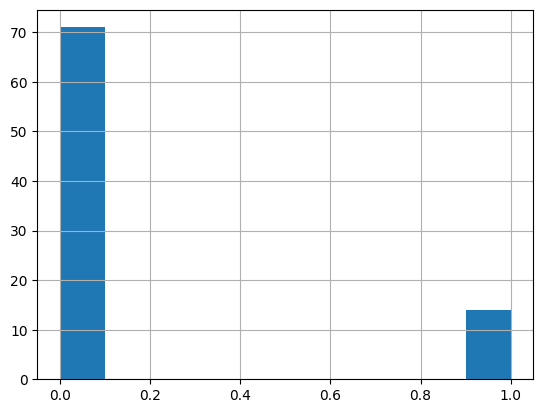

In [34]:
data ["peanutyalmondy"].hist ()

array([[<Axes: title={'center': '0'}>]], dtype=object)

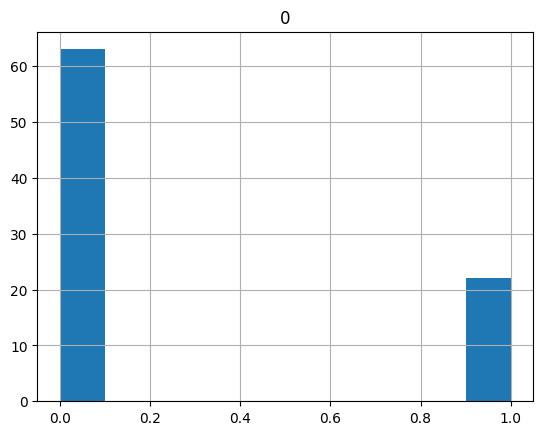

In [35]:
pd.DataFrame (y_pred_loo).hist ()

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
# Performance Metrics
print("Classification Report:")
print(classification_report(y, y_pred_loo))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_loo))

roc_auc = roc_auc_score(y, y_pred_loo)
print(f"ROC AUC Score: {roc_auc:.4f}")

precision, recall, _ = precision_recall_curve(y, y_pred_loo)
print("Precision-Recall Curve Data:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        71
           1       0.45      0.71      0.56        14

    accuracy                           0.81        85
   macro avg       0.70      0.77      0.72        85
weighted avg       0.86      0.81      0.83        85

Confusion Matrix:
[[59 12]
 [ 4 10]]
ROC AUC Score: 0.7726
Precision-Recall Curve Data:
Precision: [0.16470588 0.45454545 1.        ]
Recall: [1.         0.71428571 0.        ]


In [42]:
y_pred_proba_loo = cross_val_predict(best_pipeline, X, y, cv=loo , method = "predict_proba")

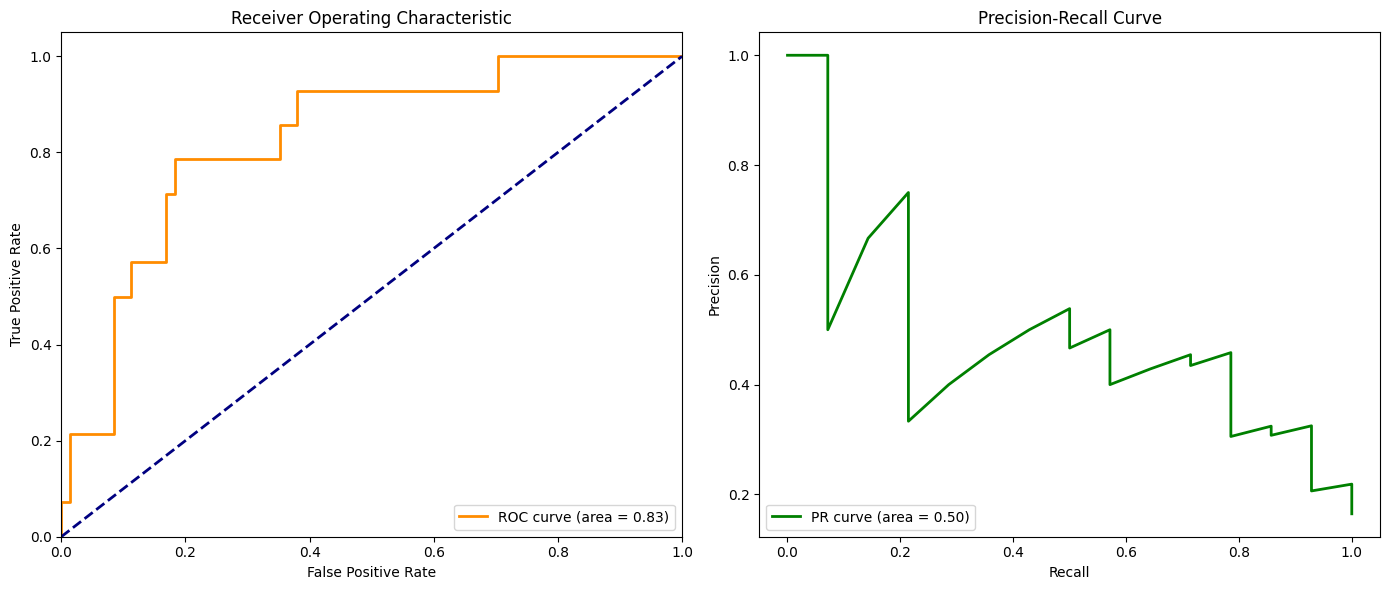

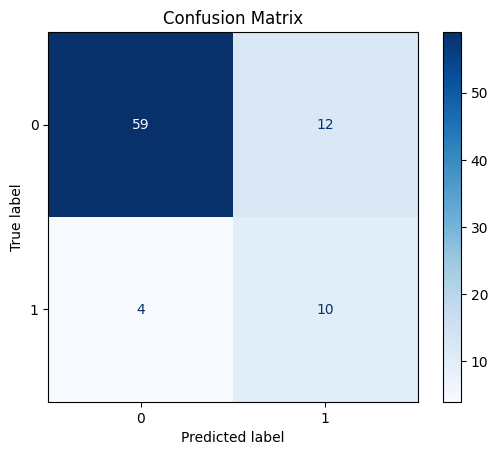

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix

# Predict probabilities
y_prob = y_pred_proba_loo [:, 1]

# Calculate ROC Curve and ROC AUC
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y, y_prob)
pr_auc = average_precision_score(y, y_prob)


# Plot ROC Curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Display Confusion Matrix
cm = confusion_matrix(y, y_pred_loo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [62]:
from sklearn.metrics import recall_score, make_scorer, classification_report, confusion_matrix , precision_score

# Emphasize recall in scoring
recall_scorer = make_scorer(recall_score, pos_label=1)


# Adjusting threshold to maximize recall
y_prob = y_pred_proba_loo [:, 1]
threshold = 0.5  # Adjust threshold to a lower value
y_pred_threshold = (y_prob >= threshold).astype(int)

# Performance Metrics
print("Classification Report with Adjusted Threshold:")
print(classification_report(y, y_pred_threshold))

print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y, y_pred_threshold))

recall = recall_score(y, y_pred_threshold)
print(f"Recall Score with Adjusted Threshold: {recall:.4f}")

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        71
           1       0.45      0.71      0.56        14

    accuracy                           0.81        85
   macro avg       0.70      0.77      0.72        85
weighted avg       0.86      0.81      0.83        85

Confusion Matrix with Adjusted Threshold:
[[59 12]
 [ 4 10]]
Recall Score with Adjusted Threshold: 0.7143


array([[<Axes: title={'center': '0'}>]], dtype=object)

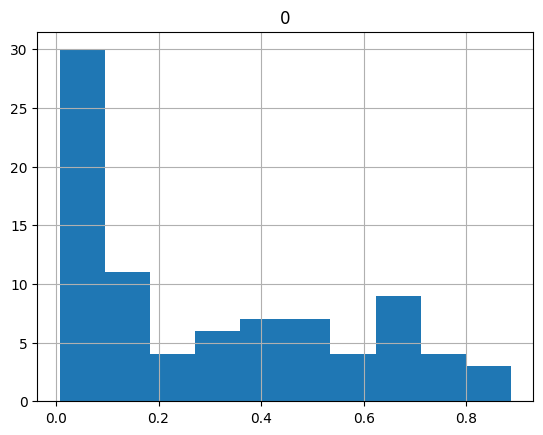

In [61]:
pd.DataFrame ( y_pred_proba_loo [:, 1] ).hist ()

In [59]:
# Get precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_pred_loo)
y_prob                        = y_pred_proba_loo [:, 1]

# Determine optimal threshold for different recall constraints
recall_constraints = [0,0.1,0.2,0.3,0.4,0.5,0.8, 0.9, 1.0]  # Adjust as needed
optimal_thresholds = []

for constraint in recall_constraints:
    idx = np.where(recall >= constraint)[0][0]
    optimal_thresholds.append(thresholds[idx])

# Evaluate each threshold
for threshold, constraint in zip(optimal_thresholds, recall_constraints):
    y_pred_thresh = (y_prob >= threshold).astype(int)
    precision_val = precision_score(y, y_pred_thresh)
    recall_val = recall_score(y, y_pred_thresh)
    print(f"Threshold for Recall >= {constraint}: {threshold:.2f}")
    print(f"Precision: {precision_val:.4f}, Recall: {recall_val:.4f}")


Threshold for Recall >= 0: 0.00
Precision: 0.1647, Recall: 1.0000
Threshold for Recall >= 0.1: 0.00
Precision: 0.1647, Recall: 1.0000
Threshold for Recall >= 0.2: 0.00
Precision: 0.1647, Recall: 1.0000
Threshold for Recall >= 0.3: 0.00
Precision: 0.1647, Recall: 1.0000
Threshold for Recall >= 0.4: 0.00
Precision: 0.1647, Recall: 1.0000
Threshold for Recall >= 0.5: 0.00
Precision: 0.1647, Recall: 1.0000
Threshold for Recall >= 0.8: 0.00
Precision: 0.1647, Recall: 1.0000
Threshold for Recall >= 0.9: 0.00
Precision: 0.1647, Recall: 1.0000
Threshold for Recall >= 1.0: 0.00
Precision: 0.1647, Recall: 1.0000
